# Waka
## An exploration of the best-selling videogames in history

### 1. Setup workspace

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Append folder for custom libraries
import sys
sys.path.append('libraries')

#Import custom library
import shinypanda

vg_sales = pd.read_csv('data/vgsales.csv') 
vg_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


### 2. Clean dataframe

#### 2.1 Remove VGChartz meta columns
*Last_Update*, *url*, *status*, *Vgchartzscore* and *img_url*

In [2]:
try:
    vg_sales = vg_sales.drop(['Last_Update', 'url', 'status', 'Vgchartzscore', 'img_url'], axis=1)
except:
    print('Columns could not be removed. Probably the cell had been executed before.')
    
vg_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


#### 2.2 Remove columns with a significative percentage of empty values

In [3]:
#By default, 'wipe_empty_columns' remove columns with more than 70% of NaN
#'exceptions' parameter is used to ignore columns
vg_sales = shinypanda.wipe_empty_columns(vg_sales, exceptions=["Critic_Score"])
vg_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,NaN,2009.0


In [4]:
#Check number of NaN in every column now
missing_data = vg_sales.isna()
missing_data = missing_data.sum()

missing_data

Rank                0
Name                0
basename            0
Genre               0
ESRB_Rating     32169
Platform            0
Publisher           0
Developer          17
Critic_Score    49256
Global_Sales    36377
Year              979
dtype: int64

### 3. Visualization of the data

#### 3.1 Releases per year
How have releases increased over time?

In [5]:
#Group releases by year
year_releases = vg_sales.groupby(vg_sales['Year']).count()

#Format dataframe
year_releases = year_releases[['Rank']]
year_releases = year_releases.rename(columns={'Rank': 'Releases'})
year_releases.head()

year_with_most_releases = int(year_releases['Releases'].idxmax())

print('The year with more new videogames was', year_with_most_releases)

The year with more new videogames was 2009


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1085f9940>]],
      dtype=object)

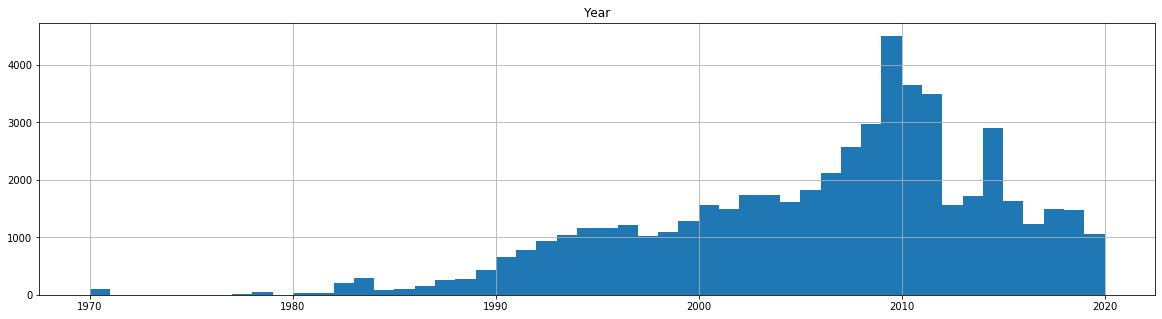

In [6]:
vg_sales.hist(column='Year', figsize=(20,5), bins=50)

#### 3.2 Average number of video games per company

In [7]:
#Group releases by company
publishers_releases = vg_sales.groupby(vg_sales['Publisher']).count()

#Format dataframe
publishers_releases = publishers_releases[['Rank']]
publishers_releases = publishers_releases.rename(columns={'Rank': 'Releases'})

#Remove 'Unknown' publisher
publishers_releases = publishers_releases.drop(['Unknown'])

publishers_releases.head()

,Releases
Publisher,
100 Gates,2
10TACLE Studios,6
10tons,7
10tons Ltd,32
11 bit studios,30


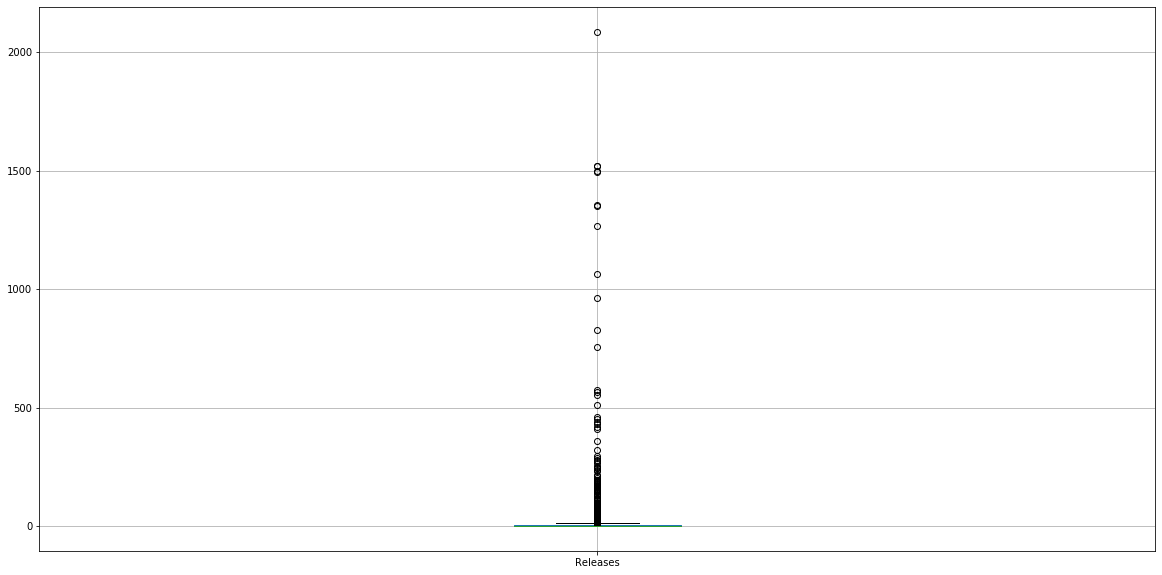

In [8]:
publishers_releases.boxplot(figsize=(20,10), grid=True)

There seems to be a lot of difference between the biggest companies in the sector and the rest, so we will zoom in only on the ones that top the ranking.

#### 3.3 Video games published by top companies

In [21]:
#Select the 1% of companies with the highest number of releases
top_publishers = publishers_releases.copy()
top_publishers_quantile = top_publishers.Releases.quantile(0.99)
top_publishers['Releases'] = top_publishers[top_publishers['Releases'] > top_publishers_quantile]['Releases']
top_publishers = top_publishers.dropna()

#Sort values
top_publishers = top_publishers.sort_values(by='Releases', ascending=False)

top_publishers.head()

,Releases
Publisher,
Sega,2085.0
Ubisoft,1519.0
Activision,1519.0
Electronic Arts,1498.0
Konami,1495.0


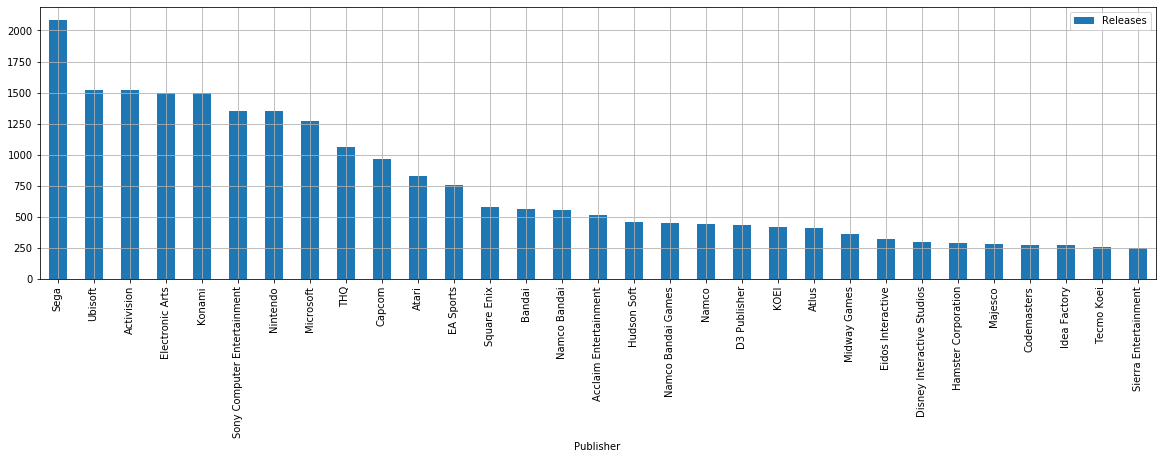

In [23]:
top_publishers.plot.bar(figsize=(20,5), grid=True)

#### 3.4 Evolution of the 10 biggest companies over time
What is the growth trend of the biggest companies? Is Sega still dominating the market today?

In [166]:
#Create a list with top 10 companies
top_10_companies = top_publishers.index.tolist()[:10]

#Filter database with this companies
vg_sales_top_10 = vg_sales[vg_sales.Publisher.isin(top_10_companies)]
vg_sales_top_10.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,NaN,2008.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,NaN,2009.0
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0


In [167]:
#Clean and format dataframe
vg_sales_top_10 = vg_sales_top_10[['Publisher', 'Year']]
vg_sales_top_10 = vg_sales_top_10.groupby(['Year', 'Publisher']).size()
vg_sales_top_10 = vg_sales_top_10.to_frame()

vg_sales_top_10.head()

0
Year   Publisher    
1970.0 Activision  1
       Ubisoft     1
1975.0 Nintendo    1
1980.0 Activision  5
1981.0 Activision  6

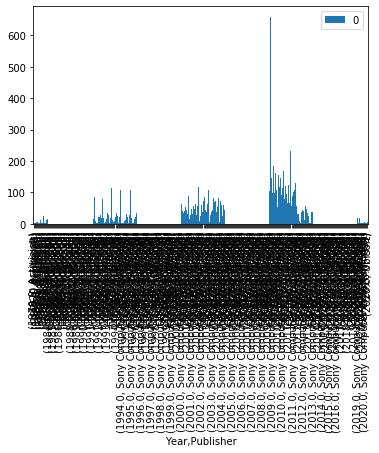

In [169]:
vg_sales_top_10.plot.bar()